<a href="https://colab.research.google.com/github/Rayryu/Urban-Air-Pollution-Challenge/blob/master/Urban_Air_Pollution_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = "./"

In [2]:
data = pd.read_csv("Train.csv")
#Remove the first 3 columns
data = data.drop(["Place_ID X Date", "Date", "Place_ID"], axis = 1)
data.head()

target  target_min  target_max  target_variance  target_count  \
0    38.0        23.0        53.0           769.50            92   
1    39.0        25.0        63.0          1319.85            91   
2    24.0         8.0        56.0          1181.96            96   
3    49.0        10.0        55.0          1113.67            96   
4    21.0         9.0        52.0          1164.82            95   

   precipitable_water_entire_atmosphere  relative_humidity_2m_above_ground  \
0                             11.000000                          60.200001   
1                             14.600000                          48.799999   
2                             16.400000                          33.400002   
3                              6.911948                          21.300001   
4                             13.900001                          44.700001   

   specific_humidity_2m_above_ground  temperature_2m_above_ground  \
0                            0.00804                    18.516840   
1                            0.00839                    22.546533   
2                            0.00750                    27.031030   
3                            0.00391                    23.971857   
4                            0.00535                    16.816309   

   u_component_of_wind_10m_above_ground  ...  L3_SO2_sensor_zenith_angle  \
0                              1.996377  ...                   38.593017   
1                              3.330430  ...                   59.624912   
2                              5.065727  ...                   49.839714   
3                              3.004001  ...                   29.181258   
4                              2.621787  ...                    0.797294   

   L3_SO2_solar_azimuth_angle  L3_SO2_solar_zenith_angle  \
0                  -61.752587                  22.363665   
1                  -67.693509                  28.614804   
2                  -78.342701                  34.296977   
3                  -73.896588                  30.545446   
4                  -68.612480                  26.899694   

   L3_CH4_CH4_column_volume_mixing_ratio_dry_air  L3_CH4_aerosol_height  \
0                                    1793.793579            3227.855469   
1                                    1789.960449            3384.226562   
2                                            NaN                    NaN   
3                                            NaN                    NaN   
4                                            NaN                    NaN   

   L3_CH4_aerosol_optical_depth  L3_CH4_sensor_azimuth_angle  \
0                      0.010579                    74.481049   
1                      0.015104                    75.630043   
2                           NaN                          NaN   
3                           NaN                          NaN   
4                           NaN                          NaN   

   L3_CH4_sensor_zenith_angle  L3_CH4_solar_azimuth_angle  \
0                   37.501499                  -62.142639   
1                   55.657486                  -53.868134   
2                         NaN                         NaN   
3                         NaN                         NaN   
4                         NaN                         NaN   

   L3_CH4_solar_zenith_angle  
0                  22.545118  
1                  19.293652  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 79 columns]

# Data exploration

## Columns description

In [3]:
data.describe()

target    target_min    target_max  target_variance  \
count  30557.000000  30557.000000  30557.000000     3.055700e+04   
mean      61.148045     29.025866    117.992234     7.983756e+03   
std       46.861309     33.119775    100.417713     4.863090e+04   
min        1.000000      1.000000      1.000000     0.000000e+00   
25%       25.000000      5.000000     60.000000     1.064920e+03   
50%       50.000000     15.000000     91.000000     2.395350e+03   
75%       80.000000     44.000000    155.000000     5.882550e+03   
max      815.000000    438.000000    999.000000     1.841490e+06   

       target_count  precipitable_water_entire_atmosphere  \
count  30557.000000                          30557.000000   
mean     125.831135                             15.302326   
std      146.581856                             10.688573   
min        2.000000                              0.420044   
25%       44.000000                              7.666667   
50%       72.000000                             12.200000   
75%      150.000000                             19.900000   
max     1552.000000                             72.599998   

       relative_humidity_2m_above_ground  specific_humidity_2m_above_ground  \
count                       30557.000000                       30557.000000   
mean                           70.552747                           0.006004   
std                            18.807884                           0.003787   
min                             5.128572                           0.000139   
25%                            58.600002                           0.003403   
50%                            74.099998                           0.004912   
75%                            85.450001                           0.007562   
max                           100.000000                           0.021615   

       temperature_2m_above_ground  u_component_of_wind_10m_above_ground  ...  \
count                 30557.000000                          30557.000000  ...   
mean                      9.321342                              0.416886  ...   
std                       9.343226                              2.707990  ...   
min                     -34.647879                            -15.559646  ...   
25%                       3.123071                             -1.097864  ...   
50%                       8.478424                              0.222092  ...   
75%                      16.201563                              1.772925  ...   
max                      37.437921                             17.955124  ...   

       L3_SO2_sensor_zenith_angle  L3_SO2_solar_azimuth_angle  \
count                23320.000000                23320.000000   
mean                    35.590916                 -123.697777   
std                     18.955228                   71.916036   
min                      0.000000                 -179.880630   
25%                     19.451524                 -165.882624   
50%                     37.918838                 -156.637162   
75%                     52.270055                 -118.453598   
max                     66.111289                  179.776125   

       L3_SO2_solar_zenith_angle  \
count               23320.000000   
mean                   46.533951   
std                    14.594267   
min                     0.000000   
25%                    36.693094   
50%                    47.445010   
75%                    57.438181   
max                    79.631711   

       L3_CH4_CH4_column_volume_mixing_ratio_dry_air  L3_CH4_aerosol_height  \
count                                    5792.000000            5792.000000   
mean                                      923.231949            1711.793613   
std                                       929.633988            1741.299304   
min                                         0.000000               0.000000   
25%                                         0.000000               0.000000   
50%                    

## Detecting invalid data

In [4]:
data.isnull().sum(axis=1)

0         6
1         0
2         7
3         7
4         7
         ..
30552     7
30553     0
30554     7
30555     7
30556    63
Length: 30557, dtype: int64

## Simple missing data replacement

In [5]:
data.columns[data.isna().sum()!=0]

Index(['L3_NO2_NO2_column_number_density',
       'L3_NO2_NO2_slant_column_number_density',
       'L3_NO2_absorbing_aerosol_index', 'L3_NO2_cloud_fraction',
       'L3_NO2_sensor_altitude', 'L3_NO2_sensor_azimuth_angle',
       'L3_NO2_sensor_zenith_angle', 'L3_NO2_solar_azimuth_angle',
       'L3_NO2_solar_zenith_angle',
       'L3_NO2_stratospheric_NO2_column_number_density',
       'L3_NO2_tropopause_pressure',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature',
       'L3_O3_cloud_fraction', 'L3_O3_sensor_azimuth_angle',
       'L3_O3_sensor_zenith_angle', 'L3_O3_solar_azimuth_angle',
       'L3_O3_solar_zenith_angle', 'L3_CO_CO_column_number_density',
       'L3_CO_H2O_column_number_density', 'L3_CO_cloud_height',
       'L3_CO_sensor_altitude', 'L3_CO_sensor_azimuth_angle',
       'L3_CO_sensor_zenith_angle', 'L3_CO_solar_azimuth_angle',
       'L3_CO_solar_zenith_angle', 'L3_HCHO_HCHO_slant_column_nu

In [6]:
def replace_null(data):
    # To Do: fill with real min values!!

    return data.fillna(0)

In [7]:
data = replace_null(data)

## Analysing features #1

/tmp/ipykernel_14418/1168595738.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['target'])


<AxesSubplot: xlabel='target', ylabel='Density'>

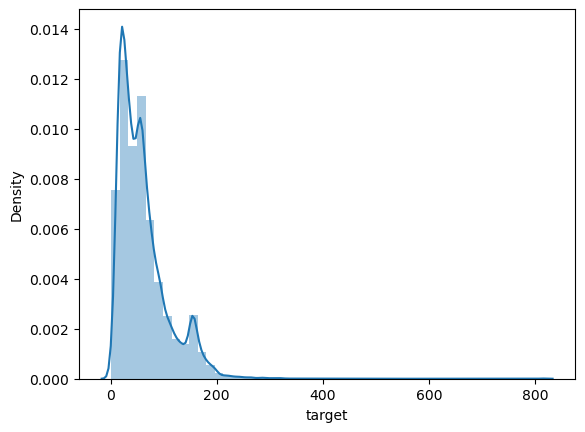

In [8]:
sns.distplot(data['target'])

<AxesSubplot: xlabel='L3_NO2_NO2_column_number_density', ylabel='target'>

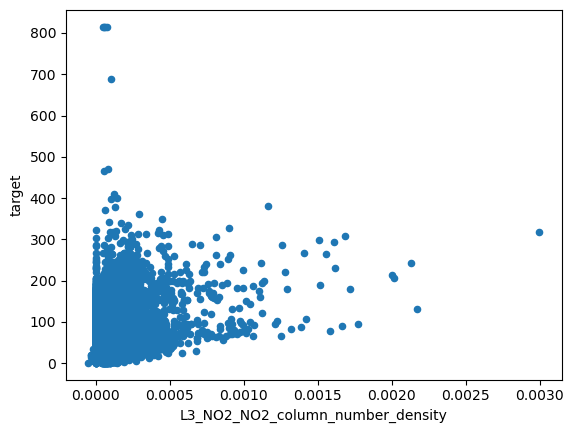

In [9]:
#scatter plot L3_NO2_NO2_column_number_density/target
var = 'L3_NO2_NO2_column_number_density'
_data = pd.concat([data['target'], data[var]], axis=1)
_data.plot.scatter(x=var, y='target')

In [10]:
corr = data.corr()
top_corr_features = corr.index

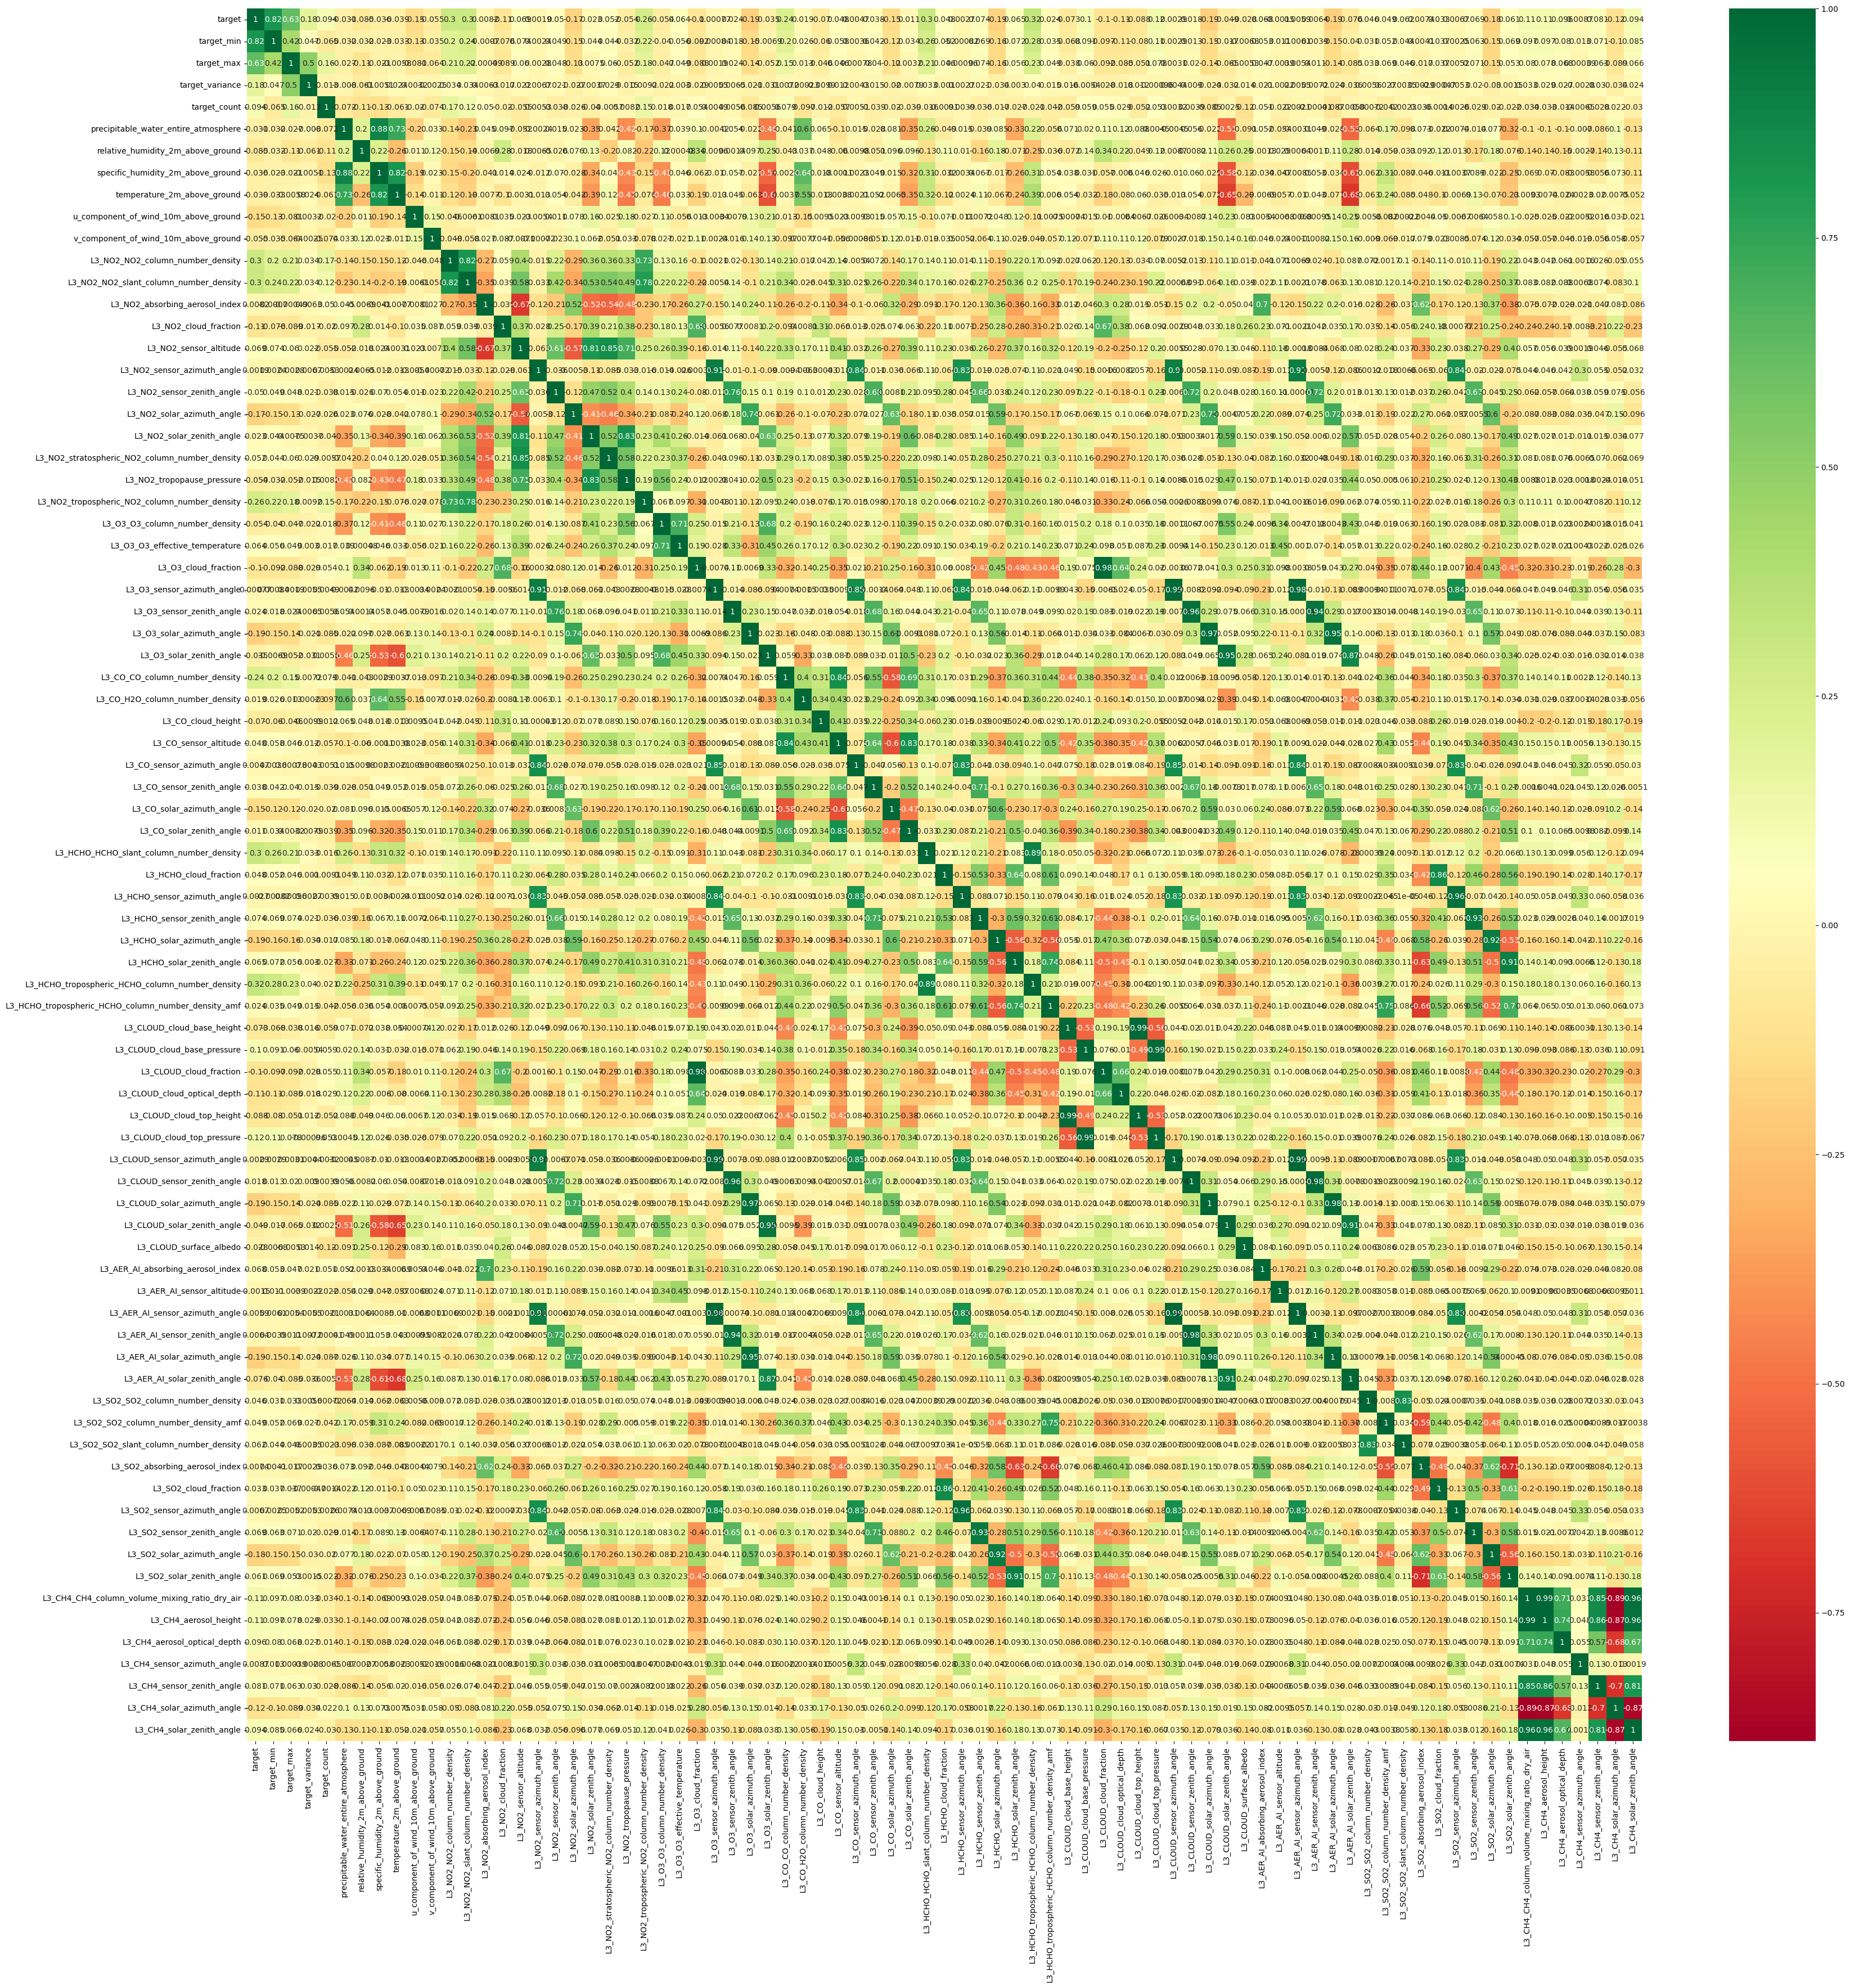

In [11]:
plt.figure(figsize=(40,40))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [12]:
# Sorting correlations
corr_matrix  = corr.abs()
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False)).to_frame()

sol.head(30)

/tmp/ipykernel_14418/3133706612.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False)).to_frame()


0
L3_CH4_CH4_column_volume_mixing_ratio_dry_air L3_CH4_aerosol_height                            0.994228
L3_CLOUD_sensor_azimuth_angle                 L3_AER_AI_sensor_azimuth_angle                   0.994101
L3_CLOUD_cloud_base_height                    L3_CLOUD_cloud_top_height                        0.992572
L3_CLOUD_cloud_base_pressure                  L3_CLOUD_cloud_top_pressure                      0.991777
L3_O3_sensor_azimuth_angle                    L3_CLOUD_sensor_azimuth_angle                    0.989722
                                              L3_AER_AI_sensor_azimuth_angle                   0.984994
L3_O3_cloud_fraction                          L3_CLOUD_cloud_fraction                          0.983971
L3_CLOUD_sensor_zenith_angle                  L3_AER_AI_sensor_zenith_angle                    0.982830
L3_CLOUD_solar_azimuth_angle                  L3_AER_AI_solar_azimuth_angle                    0.980190
L3_O3_solar_azimuth_angle                     L3_CLOUD_solar_azimuth_angle                     0.967102
L3_CH4_CH4_column_volume_mixing_ratio_dry_air L3_CH4_solar_zenith_angle                        0.964251
L3_HCHO_sensor_azimuth_angle                  L3_SO2_sensor_azimuth_angle                      0.961999
L3_CH4_aerosol_height                         L3_CH4_solar_zenith_angle                        0.959611
L3_O3_sensor_zenith_angle                     L3_CLOUD_sensor_zenith_angle                     0.958584
L3_O3_solar_azimuth_angle                     L3_AER_AI_solar_azimuth_angle                    0.951710
L3_O3_solar_zenith_angle                      L3_CLOUD_solar_zenith_angle                      0.946138
L3_O3_sensor_zenith_angle                     L3_AER_AI_sensor_zenith_angle                    0.942787
L3_HCHO_sensor_zenith_angle                   L3_SO2_sensor_zenith_angle                       0.930805
L3_HCHO_solar_azimuth_angle                   L3_SO2_solar_azimuth_angle                       0.919376
L3_CLOUD_solar_zenith_angle                   L3_AER_AI_solar_zenith_angle                     0.913895
L3_NO2_sensor_azimuth_angle                   L3_O3_sensor_azimuth_angle                       0.913827
                                              L3_AER_AI_sensor_azimuth_angle                   0.905496
L3_HCHO_solar_zenith_angle                    L3_SO2_solar_zenith_angle                        0.905320
L3_NO2_sensor_azimuth_angle                   L3_CLOUD_sensor_azimuth_angle                    0.904461
L3_HCHO_HCHO_slant_column_number_density      L3_HCHO_tropospheric_HCHO_column_number_density  0.894578
L3_CH4_CH4_column_volume_mixing_ratio_dry_air L3_CH4_solar_azimuth_angle                       0.890242
precipitable_water_entire_atmosphere          specific_humidity_2m_above_ground                0.882341
L3_CH4_aerosol_height                         L3_CH4_solar_azimuth_angle                       0.872953
L3_O3_solar_zenith_angle                      L3_AER_AI_solar_zenith_angle                     0.870788
L3_CH4_solar_azimuth_angle                    L3_CH4_solar_zenith_angle                        0.866205

We can see that the majority of correlated variables are solar and sensor  related ones. 
Hypothesis: The data is from the same sensor!

The other correlated columns:

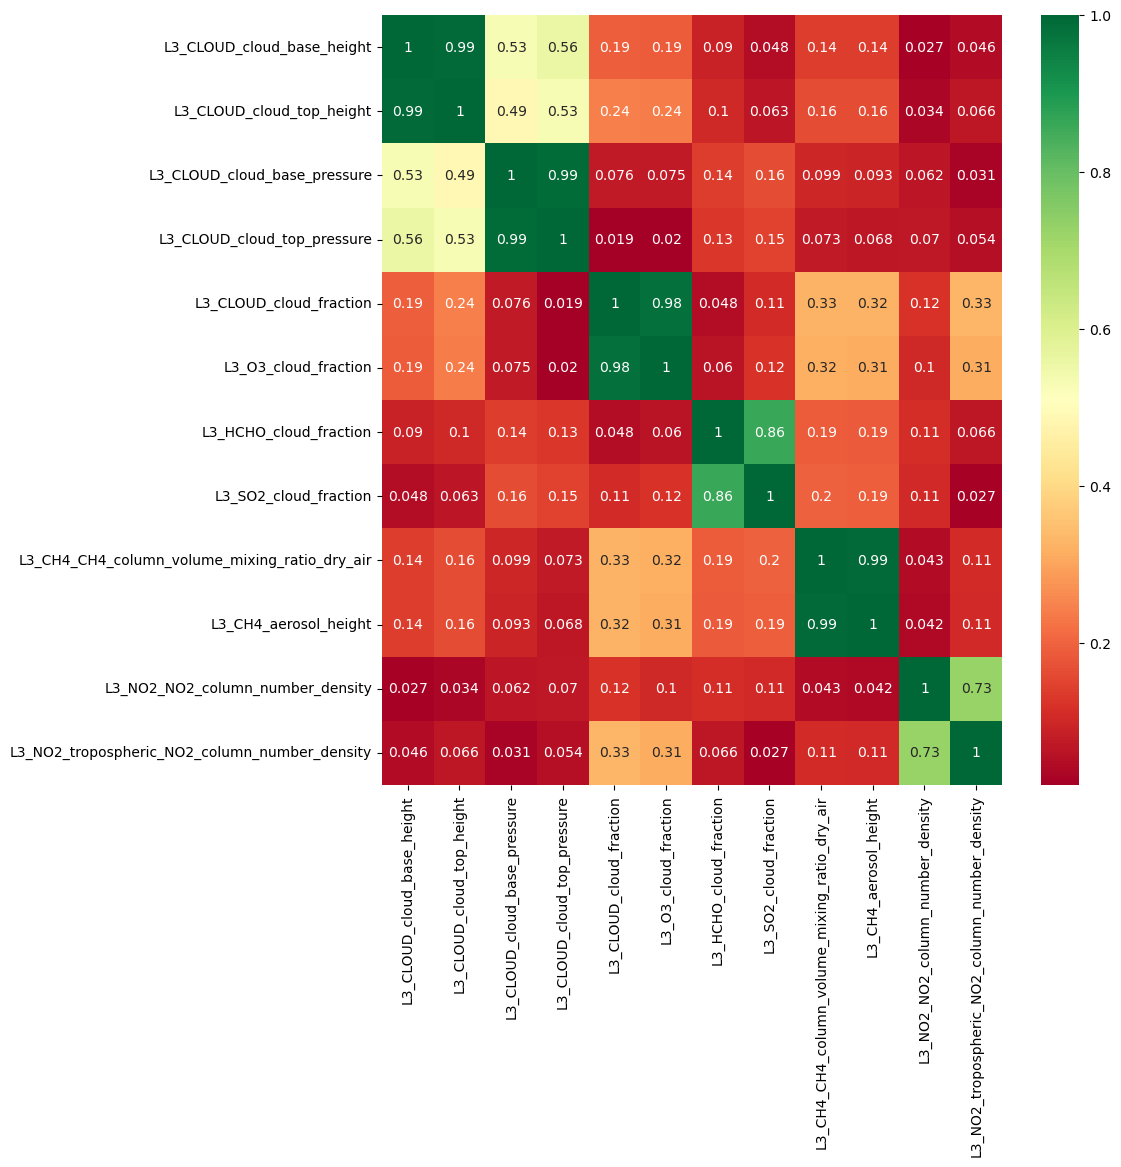

In [13]:
corr_cols = ["L3_CLOUD_cloud_base_height", "L3_CLOUD_cloud_top_height", "L3_CLOUD_cloud_base_pressure", "L3_CLOUD_cloud_top_pressure", 
             "L3_CLOUD_cloud_fraction", "L3_O3_cloud_fraction", "L3_HCHO_cloud_fraction", "L3_SO2_cloud_fraction",
             "L3_CH4_CH4_column_volume_mixing_ratio_dry_air", "L3_CH4_aerosol_height", 
             "L3_NO2_NO2_column_number_density", "L3_NO2_tropospheric_NO2_column_number_density"
             ]

sub_corr = pd.DataFrame(data, columns= corr_cols)
sub_corr_features = sub_corr.index
plt.figure(figsize=(10,10))
g=sns.heatmap(sub_corr.corr().abs(),annot=True,cmap="RdYlGn")

## Analysing features #2 (feature correlation)

### Selecting features based on correlation

In [14]:
def select_features_on_correlation(data, threshold):
    corr = data.corr()
    columns = np.full((corr.shape[0],), True, dtype=bool)
    for i in range(corr.shape[0]):
        for j in range(i+1, corr.shape[0]):
            if corr.iloc[i,j] >= threshold:
                if columns[j]:
                    columns[j] = False
    selected_columns = data.columns[columns]
    
    return data[selected_columns]

In [15]:
fc_data = select_features_on_correlation(data, threshold=0.9)
fc_data.shape

(30557, 61)

### Selecting columns based on p-value

In [16]:
#Skipping target values
selected_columns = fc_data.columns[5:].values

import statsmodels.api as sm

def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

SL = 0.05
data_modeled, selected_columns = backwardElimination(fc_data.iloc[:,5:].values, fc_data.iloc[:,0].values, SL, selected_columns)

In [17]:
len(selected_columns)

46

### Creating out final dataset

In [18]:
y = pd.DataFrame()
y['target'] = data.iloc[:,0].values.ravel()

In [19]:
X = pd.DataFrame(data = data_modeled, columns = selected_columns)

### Preparing train data

In [20]:
th = 1
SL = 0.05

fc_data = select_features_on_correlation(data, threshold=th)
selected_columns = fc_data.columns[5:].values
data_modeled, selected_columns = backwardElimination(fc_data.iloc[:,5:].values, fc_data.iloc[:,0].values, SL, selected_columns)

X = pd.DataFrame(data = data_modeled, columns = selected_columns)
print(X.shape)

(30557, 54)


### Preparing test data

In [21]:
test_data = pd.read_csv("Test.csv")
ids = test_data["Place_ID X Date"]
test_data = test_data.drop(["Place_ID X Date", "Date", "Place_ID"], axis = 1)

test_data = replace_null(test_data)

test_data = pd.DataFrame(data = test_data, columns = selected_columns)

test_data.shape

(16136, 54)

## Training

In [22]:
from sklearn import linear_model

lr = linear_model.LinearRegression()
lr.fit(X, y)
lr.score(X,y)

0.36179724912532774

In [23]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)
regr.score(X, y)

/tmp/ipykernel_14418/4175029366.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X, y)


0.2029965904259916

In [24]:
import xgboost

xgb_model = xgboost.XGBRegressor()
xgb_model.fit(X, y) 
xgb_model.score(X, y)

0.8158975568547758

## Prediction

In [25]:
model = xgb_model

In [26]:
prediction = model.predict(test_data)

In [27]:
prediction_df = pd.DataFrame(ids, columns=['Place_ID X Date'])
prediction_df["target"] = prediction
prediction_df.head()

Place_ID X Date     target
0  0OS9LVX X 2020-01-02  36.424450
1  0OS9LVX X 2020-01-03  23.814426
2  0OS9LVX X 2020-01-04  23.213461
3  0OS9LVX X 2020-01-05  30.203531
4  0OS9LVX X 2020-01-06  26.334181

In [28]:
prediction_df.to_csv("simple_submission#fs1.csv", index=False)

Removing geolocalisation features

In [29]:
sensor_azimuth_cols = [col for col in data.columns if "sensor_azimuth_angle" in col]
sensor_zenith_cols = [col for col in data.columns if "sensor_zenith_angle" in col]
solar_azimuth_cols = [col for col in data.columns if "solar_azimuth_angle" in col]
solar_zenith_cols = [col for col in data.columns if "solar_zenith_angle" in col]

In [30]:
from sklearn.metrics import mean_squared_error

overall_err = 0
for cols_group in [sensor_azimuth_cols, sensor_zenith_cols, solar_azimuth_cols, solar_zenith_cols]:
    group_err = 0
    base = cols_group[0]
    for col in cols_group:
        #if "CH4" in col: continue
        err = mean_squared_error(data[base], data[col]) / data.shape[0]
        group_err += err
    overall_err += group_err
    print(group_err)

print(overall_err)

0.3741335317028337
0.09881860102803094
1.330397849965021
0.15091010095243937
1.9542600836483253


solar_azimuth_cols is the columns group presenting a large error value, this is due to the missing values


In [31]:
angle_data = data[[*sensor_azimuth_cols, *sensor_zenith_cols, *solar_azimuth_cols, *solar_zenith_cols]]

In [32]:
angle_data.head(20)

L3_NO2_sensor_azimuth_angle  L3_O3_sensor_azimuth_angle  \
0                     76.537512                   76.536426   
1                    -14.708036                  -14.708036   
2                   -105.201338                 -105.201338   
3                   -104.334056                 -104.334066   
4                     58.850179                   58.850179   
5                     76.387678                   76.387658   
6                     -6.120488                   -6.118364   
7                    -13.662432                  -13.662432   
8                   -104.544468                 -104.544468   
9                   -104.110578                 -104.110578   
10                    76.284557                   76.284571   
11                    76.746535                   76.747225   
12                   -14.188831                  -14.188831   
13                  -104.832309                 -104.832309   
14                  -104.193670                 -104.193670   
15                    76.222707                   76.222710   
16                    76.533130                   76.532846   
17                   -14.717713                  -14.717713   
18                  -105.208286                 -105.208286   
19                  -104.338722                 -104.338722   

    L3_CO_sensor_azimuth_angle  L3_HCHO_sensor_azimuth_angle  \
0                    74.543393                     76.536426   
1                   -57.015200                    -14.708036   
2                  -103.494458                   -105.201338   
3                  -101.955931                   -104.334066   
4                    15.499573                     58.850179   
5                    74.053369                     76.387658   
6                    75.304084                   -106.238308   
7                   -13.663531                    -13.662432   
8                  -102.555174                   -104.544468   
9                   -97.761258                   -104.110578   
10                   73.155714                     76.284571   
11                   74.923469                     76.747225   
12                  -35.879375                    -14.188831   
13                 -103.029567                   -104.832309   
14                 -100.930576                   -104.193670   
15                   70.535614                     76.222710   
16                   74.541141                     76.532846   
17                    0.000000                     77.347534   
18                 -103.504334                   -105.208286   
19                 -101.970553                   -104.338722   

    L3_CLOUD_sensor_azimuth_angle  L3_AER_AI_sensor_azimuth_angle  \
0                       76.536426                       76.537512   
1                      -14.708036                      -14.708036   
2                     -105.201338                     -105.201338   
3                     -104.334066                     -104.334056   
4                       58.850179                       58.850179   
5                       76.387658                       76.387658   
6                       -6.118364                       -6.120488   
7                      -13.662432                      -13.662432   
8                     -104.544468                     -104.544468   
9                     -104.110578                     -104.110578   
10                      76.284571                       76.284571   
11                      76.747225                       76.746535   
12                     -14.188831                      -14.188831   
13                    -104.832309                     -104.832309   
14                    -104.193670                     -104.193670   
15                      76.222710                       76.222710   
16                      76.532846                       76.533166   
17                     -14.717713                      -14.717713   
18                    -1

Is their any columns with non-missing values? 

In [33]:
angle_data.shape

(30557, 32)

In [34]:
angle_data.astype(bool).sum(axis=0)

L3_NO2_sensor_azimuth_angle       25756
L3_O3_sensor_azimuth_angle        29621
L3_CO_sensor_azimuth_angle        24804
L3_HCHO_sensor_azimuth_angle      22802
L3_CLOUD_sensor_azimuth_angle     30183
L3_AER_AI_sensor_azimuth_angle    30360
L3_SO2_sensor_azimuth_angle       22990
L3_CH4_sensor_azimuth_angle        2877
L3_NO2_sensor_zenith_angle        25756
L3_O3_sensor_zenith_angle         29621
L3_CO_sensor_zenith_angle         24804
L3_HCHO_sensor_zenith_angle       22802
L3_CLOUD_sensor_zenith_angle      30183
L3_AER_AI_sensor_zenith_angle     30360
L3_SO2_sensor_zenith_angle        22990
L3_CH4_sensor_zenith_angle         2877
L3_NO2_solar_azimuth_angle        25756
L3_O3_solar_azimuth_angle         29621
L3_CO_solar_azimuth_angle         24804
L3_HCHO_solar_azimuth_angle       22802
L3_CLOUD_solar_azimuth_angle      30183
L3_AER_AI_solar_azimuth_angle     30360
L3_SO2_solar_azimuth_angle        22990
L3_CH4_solar_azimuth_angle         2877
L3_NO2_solar_zenith_angle         25756


AER_AI has the most values and 
Lets suppose that all data are from the same sensor

## Filling missing values

### Remove other angle columns

In [35]:
angle_cols_to_remove = [col for col in data.columns if ("angle" in col) and ("AER_AI" not in col)]

In [36]:
cleaned_data = data.drop(angle_cols_to_remove, axis=1)

In [37]:
cleaned_data.head()

target  target_min  target_max  target_variance  target_count  \
0    38.0        23.0        53.0           769.50            92   
1    39.0        25.0        63.0          1319.85            91   
2    24.0         8.0        56.0          1181.96            96   
3    49.0        10.0        55.0          1113.67            96   
4    21.0         9.0        52.0          1164.82            95   

   precipitable_water_entire_atmosphere  relative_humidity_2m_above_ground  \
0                             11.000000                          60.200001   
1                             14.600000                          48.799999   
2                             16.400000                          33.400002   
3                              6.911948                          21.300001   
4                             13.900001                          44.700001   

   specific_humidity_2m_above_ground  temperature_2m_above_ground  \
0                            0.00804                    18.516840   
1                            0.00839                    22.546533   
2                            0.00750                    27.031030   
3                            0.00391                    23.971857   
4                            0.00535                    16.816309   

   u_component_of_wind_10m_above_ground  ...  L3_AER_AI_solar_azimuth_angle  \
0                              1.996377  ...                     -61.736719   
1                              3.330430  ...                     -67.693509   
2                              5.065727  ...                     -78.342701   
3                              3.004001  ...                     -73.896572   
4                              2.621787  ...                     -68.612480   

   L3_AER_AI_solar_zenith_angle  L3_SO2_SO2_column_number_density  \
0                     22.358167                         -0.000127   
1                     28.614804                          0.000150   
2                     34.296977                          0.000150   
3                     30.545393                          0.000227   
4                     26.899694                          0.000390   

   L3_SO2_SO2_column_number_density_amf  \
0                              0.312521   
1                              0.433957   
2                              0.356925   
3                              0.584522   
4                              0.408047   

   L3_SO2_SO2_slant_column_number_density  L3_SO2_absorbing_aerosol_index  \
0                               -0.000040                       -1.861476   
1                                0.000050                       -1.452612   
2                                0.000053                       -1.572950   
3                                0.000110                       -1.239317   
4                                0.000159                        0.202489   

   L3_SO2_cloud_fraction  L3_CH4_CH4_column_volume_mixing_ratio_dry_air  \
0               0.000000                                    1793.793579   
1               0.059433                                    1789.960449   
2               0.082063                                       0.000000   
3               0.121261                                       0.000000   
4               0.037919                                       0.000000   

   L3_CH4_aerosol_height  L3_CH4_aerosol_optical_depth  
0            3227.855469                      0.010579  
1            3384.226562                      0.015104  
2               0.000000                      0.000000  
3               0.000000                      0.000000  
4               0.000000                      0.000000  

[5 rows x 51 columns]

### Fill missing values (with min or mean)

In [38]:
import numpy as np 


def fill_missing_values(data):
    _data = data
    _data.loc[_data["L3_AER_AI_sensor_zenith_angle"] == 0, 'L3_AER_AI_sensor_zenith_angle'] = 0.098
    _data.loc[_data["L3_AER_AI_solar_zenith_angle"] == 0, 'L3_AER_AI_solar_zenith_angle'] = 8

    _data.loc[_data["L3_NO2_tropopause_pressure"] == 0, "L3_NO2_tropopause_pressure"] = 6156

    _data.loc[_data["L3_O3_O3_column_number_density"] == 0, "L3_O3_O3_column_number_density"] = np.mean(_data.loc[_data["L3_O3_O3_column_number_density"] != 0]) #maybe wrong
    _data.loc[_data["L3_O3_O3_effective_temperature"] == 0, "L3_O3_O3_effective_temperature"] = np.mean(_data.loc[_data["L3_O3_O3_effective_temperature"] != 0]) #maybe wrong

    _data.loc[_data["L3_HCHO_tropospheric_HCHO_column_number_density_amf"] == 0, "L3_HCHO_tropospheric_HCHO_column_number_density_amf"] = np.mean(_data.loc[_data["L3_HCHO_tropospheric_HCHO_column_number_density_amf"] != 0]) #maybe wrong

    _data.loc[_data["L3_CLOUD_cloud_base_height"] == 0, "L3_CLOUD_cloud_base_height"] = 9
    _data.loc[_data["L3_CLOUD_cloud_base_pressure"] == 0, "L3_CLOUD_cloud_base_pressure"] = 14170
    _data.loc[_data["L3_CLOUD_cloud_optical_depth"] == 0, "L3_CLOUD_cloud_optical_depth"] = 1
    _data.loc[_data["L3_CLOUD_cloud_top_height"] == 0, "L3_CLOUD_cloud_top_height"] = np.mean(_data.loc[_data["L3_CLOUD_cloud_top_height"] != 0]) #maybe wrong
    _data.loc[_data["L3_CLOUD_cloud_top_pressure"] == 0, "L3_CLOUD_cloud_top_pressure"] = 12110
    _data.loc[_data["L3_CLOUD_surface_albedo"] == 0, "L3_CLOUD_surface_albedo"] = np.mean(_data.loc[_data["L3_CLOUD_surface_albedo"] != 0]) #maybe wrong

    _data.loc[_data["L3_AER_AI_sensor_altitude"] == 0, "L3_AER_AI_sensor_altitude"] = 828543

    _data.loc[_data["L3_SO2_SO2_column_number_density_amf"] == 0, "L3_SO2_SO2_column_number_density_amf"] = 0.1

    _data.loc[_data["L3_CH4_CH4_column_volume_mixing_ratio_dry_air"] == 0, "L3_CH4_CH4_column_volume_mixing_ratio_dry_air"] = np.mean(_data.loc[_data["L3_CH4_CH4_column_volume_mixing_ratio_dry_air"] != 0]) #maybe wrong
    _data.loc[_data["L3_CH4_aerosol_height"] == 0, "L3_CH4_aerosol_height"] = np.mean(_data.loc[_data["L3_CH4_aerosol_height"] != 0]) #maybe wrong
    _data.loc[_data["L3_CH4_aerosol_optical_depth"] == 0, "L3_CH4_aerosol_optical_depth"] = np.mean(_data.loc[_data["L3_CH4_aerosol_optical_depth"] != 0]) #maybe wrong
    

    _data.fillna(_data.mean(), inplace=True)
    
    

    return _data

In [39]:
cleaned_data = data.drop(angle_cols_to_remove, axis=1)
cleaned_data = fill_missing_values(cleaned_data)

/home/ahl/.local/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/ahl/.local/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/ahl/.local/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/ahl/.local/lib/p

In [40]:
cleaned_data.head()

target  target_min  target_max  target_variance  target_count  \
0    38.0        23.0        53.0           769.50            92   
1    39.0        25.0        63.0          1319.85            91   
2    24.0         8.0        56.0          1181.96            96   
3    49.0        10.0        55.0          1113.67            96   
4    21.0         9.0        52.0          1164.82            95   

   precipitable_water_entire_atmosphere  relative_humidity_2m_above_ground  \
0                             11.000000                          60.200001   
1                             14.600000                          48.799999   
2                             16.400000                          33.400002   
3                              6.911948                          21.300001   
4                             13.900001                          44.700001   

   specific_humidity_2m_above_ground  temperature_2m_above_ground  \
0                            0.00804                    18.516840   
1                            0.00839                    22.546533   
2                            0.00750                    27.031030   
3                            0.00391                    23.971857   
4                            0.00535                    16.816309   

   u_component_of_wind_10m_above_ground  ...  L3_AER_AI_solar_azimuth_angle  \
0                              1.996377  ...                     -61.736719   
1                              3.330430  ...                     -67.693509   
2                              5.065727  ...                     -78.342701   
3                              3.004001  ...                     -73.896572   
4                              2.621787  ...                     -68.612480   

   L3_AER_AI_solar_zenith_angle  L3_SO2_SO2_column_number_density  \
0                     22.358167                         -0.000127   
1                     28.614804                          0.000150   
2                     34.296977                          0.000150   
3                     30.545393                          0.000227   
4                     26.899694                          0.000390   

   L3_SO2_SO2_column_number_density_amf  \
0                              0.312521   
1                              0.433957   
2                              0.356925   
3                              0.584522   
4                              0.408047   

   L3_SO2_SO2_slant_column_number_density  L3_SO2_absorbing_aerosol_index  \
0                               -0.000040                       -1.861476   
1                                0.000050                       -1.452612   
2                                0.000053                       -1.572950   
3                                0.000110                       -1.239317   
4                                0.000159                        0.202489   

   L3_SO2_cloud_fraction  L3_CH4_CH4_column_volume_mixing_ratio_dry_air  \
0               0.000000                                    1793.793579   
1               0.059433                                    1789.960449   
2               0.082063                                    1858.658134   
3               0.121261                                    1858.658134   
4               0.037919                                    1858.658134   

   L3_CH4_aerosol_height  L3_CH4_aerosol_optical_depth  
0            3227.855469                      0.010579  
1            3384.226562                      0.015104  
2            3446.196944                      0.032668  
3            3446.196944                      0.032668  
4            3446.196944                      0.032668  

[5 rows x 51 columns]

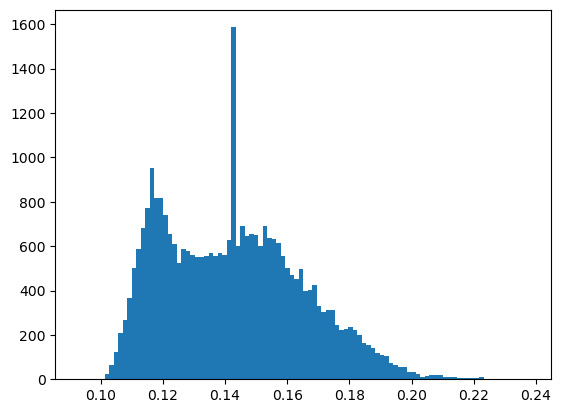

In [41]:
_ = plt.hist(cleaned_data["L3_O3_O3_column_number_density"], bins=100)

In [42]:
from sklearn.preprocessing import Binarizer

def discritize_feature(data):
    bn = Binarizer(threshold=0.9)
    data["L3_NO2_sensor_altitude"] = data["L3_NO2_sensor_altitude"].fillna(0)
    data["L3_CO_sensor_altitude"] = data["L3_CO_sensor_altitude"].fillna(0)

    data["L3_NO2_sensor_altitude"] = bn.transform([data["L3_NO2_sensor_altitude"]])[0]
    data["L3_CO_sensor_altitude"] = bn.transform([data["L3_CO_sensor_altitude"]])[0]

    return data

In [43]:
angle_cols_to_remove = [col for col in data.columns if ("angle" in col) and ("AER_AI" not in col)]
cleaned_data = data.drop(angle_cols_to_remove, axis=1)
cleaned_data = fill_missing_values(cleaned_data)
cleaned_data = discritize_feature(cleaned_data)

X = cleaned_data.iloc[:, 5:]
y = cleaned_data["target"]

X.shape

/home/ahl/.local/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/ahl/.local/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/ahl/.local/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/ahl/.local/lib/p

(30557, 46)

### Preparing test data

In [ ]:
test_data = pd.read_csv("Test.csv")
angle_cols_to_remove = [col for col in test_data.columns if ("angle" in col) and ("AER_AI" not in col)]
cleaned_test_data = test_data.drop(angle_cols_to_remove, axis=1)
cleaned_test_data = fill_missing_values(cleaned_test_data)
cleaned_test_data = discretize_feature(cleaned_test_data)
X_test = cleaned_test_data.iloc[:, 5:]
y_test = cleaned_test_data["target"]
print(X_test.shape)
print(X_test.shape)



## Training

In [ ]:
from sklearn import linear_model

lr = linear_model.LinearRegression()
lr.fit(X, y)
lr.score(X,y)

0.36401049535803787

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)
regr.score(X, y)

In [ ]:
import xgboost

angle_cols_to_remove = [col for col in data.columns if ("angle" in col) and ("AER_AI" not in col)]
cleaned_data = data.drop(angle_cols_to_remove, axis=1)
cleaned_data = fill_missing_values(cleaned_data)
cleaned_data = discritize_feature(cleaned_data)

X = cleaned_data.iloc[:, 5:]
y = cleaned_data["target"]

X.shape

import pandas as pd
from sklearn import preprocessing


def normlX(X):
    x = X.values #returns a numpy array
    cols = X.columns
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    X = pd.DataFrame(x_scaled, columns=cols)

    return X

def feature_eng(density_X):
    density_features = ["L3_NO2_NO2_column_number_density", "L3_NO2_stratospheric_NO2_column_number_density", "L3_O3_O3_column_number_density", "L3_NO2_tropospheric_NO2_column_number_density",
                    "L3_CO_CO_column_number_density", 
                    "L3_SO2_SO2_column_number_density", "L3_SO2_SO2_column_number_density_amf",
                    "L3_HCHO_tropospheric_HCHO_column_number_density", "L3_HCHO_tropospheric_HCHO_column_number_density_amf"
                    ]
    density_X["windspread"] = np.sqrt(density_X["u_component_of_wind_10m_above_ground"]**2 + density_X["v_component_of_wind_10m_above_ground"]**2)
    density_X["density_sum"] = density_X[density_features].sum(axis=1)
    density_X["L3_CH4_aerosol_height"] = np.log(density_X["L3_CH4_aerosol_height"])
    density_X["L3_NO2_tropopause_pressure"] = np.log(density_X["L3_NO2_tropopause_pressure"])
    density_X["L3_CLOUD_cloud_top_pressure"] = np.log(density_X["L3_CLOUD_cloud_top_pressure"])
    # new
    density_X["temperature_2m_above_ground"] = np.log(density_X["temperature_2m_above_ground"])
    density_X["L3_O3_O3_effective_temperature"] = np.log(density_X["L3_O3_O3_effective_temperature"])

    return density_X

def exp_feature_eng(density_X):
    return density_X.apply(np.exp)

def exp2_feature_eng(density_X):
    density_X = normlX(density_X)
    return density_X.apply(np.exp2)

def exp2_feature_eng_hardcore(density_X):
    return density_X.apply(np.exp2)

def ten_feature_eng(density_X):
    return density_X.apply(lambda x: pow(10, x))

def arccos_feature_eng(density_X):
    return density_X.apply(np.arccos)

X = feature_eng(X)



xgb_model = xgboost.XGBRegressor(min_child_weight=1, gamma=0, subsample=0.6, colsample_bytree=0.6, max_depth=10, nthread=-1)
xgb_model.fit(X, y) 
xgb_model.score(X, y)

# with X norm 0.8869287596520352
# with feature_eng 0.8931413788873316
# with new feature_eng 0.8958650386957194
# with feature_eng + X_norm  0.8918378627463109
# with exp_feature_eng 0.8910064941134513
# with Xnorm + exp(normal) 0.8878093993934109
# with exp2_feature_eng 0.8873096144088962
# with exp2_feature_eng_hardcore 0.881050223404052
# with ten_feature_eng 0.7973022545880945
# with norm + arccos 0.8848446005624693

# with feature_eng + norm + arccos 0.8962454111990809 

# with feature_eng min_child_weight=1, gamma=0.04, subsample=0.7, colsample_bytree=0.6, max_depth=10, nthread=-1      0.913982030463545

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[23:58:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8932762991665388

## Prediction

In [ ]:
model = xgb_model

In [ ]:
test_data = pd.read_csv(path+"Test.csv")
ids = test_data["Place_ID X Date"]
test_data = test_data.drop(["Place_ID X Date", "Date", "Place_ID"], axis = 1)

test_data = test_data.drop(angle_cols_to_remove, axis=1)
test_data = fill_missing_values(test_data)
test_data = discritize_feature(test_data)


test_data = feature_eng(test_data)

prediction = model.predict(test_data)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
prediction_df = pd.DataFrame(ids, columns=['Place_ID X Date'])
prediction_df["target"] = prediction
prediction_df.head()

Place_ID X Date     target
0  0OS9LVX X 2020-01-02  49.740780
1  0OS9LVX X 2020-01-03  38.209949
2  0OS9LVX X 2020-01-04  48.799992
3  0OS9LVX X 2020-01-05  46.347565
4  0OS9LVX X 2020-01-06  30.020870

In [ ]:
prediction_df.to_csv("simple_submission#fs1.csv", index=False)